# Técnicas de Validación Cruzada

## Estrategias de validación cruzada

Hay varias formas de realizar validación cruzada y, dependiendo del modelo, la disponibilidad de datos y el tipo de problema con el que estemos trabajando será un factor decisivo sobre qué técnica funcionará mejor.

Algunas de las técnicas más importantes son las siguientes:

## Holdout Cross-Validation

- It is the most commonly used technique for validation. 
- We split the entire dataset into two unequal halves, where most of the data points are used for training and the rest will be used to validate the model, i.e. 
- to make sure that reduction in the objective function is corresponding to better predictions and is not a case of overfitting. 
- A simple cross-validation example for this will be splitting the dataset into a 70:30 ratio where the 70% of the dataset will be used for the training process, and the 30% of the dataset will be used for validation of the model.

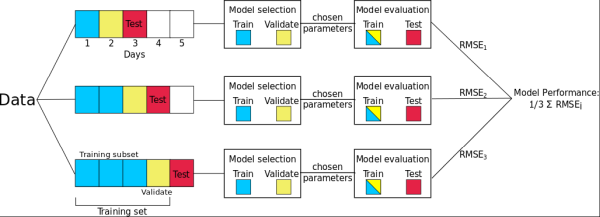

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris=load_iris()
X=iris.data
Y=iris.target


linear_reg=LogisticRegression()
# the actual splitting happens here
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
linear_reg.fit(x_train,y_train)
predictions=linear_reg.predict(x_test)

print("Accuracy score on training set is {}".format(accuracy_score(linear_reg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predictions,y_test)))

## Stratified K-Fold CV

- Stratification is used when the datasets contain unbalanced classes. 
- Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes. 
-  Some unbalanced samples may produce exceptionally high scores leading to a high cross-validation score overall, which is undesirable. 
- Therefore we create stratified subsamples that preserve the class frequencies in the individual folds to ensure that we are able to get a clear picture of the model performance. 

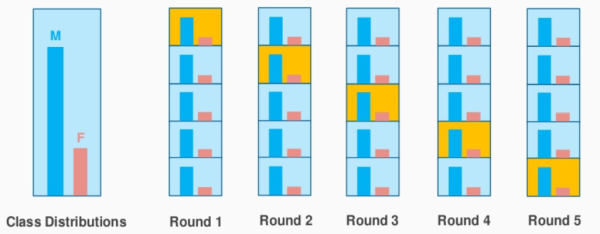

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target

linear_reg=LogisticRegression()
Stratified_cross_validate=StratifiedKFold(n_splits=5)
score=cross_val_score(linear_reg,X,Y,cv=Stratified_cross_validate)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

## Leave P Out CV

Leave P out is one of the exhaustive cross-validation techniques, where we use the entire dataset for the training and validation cycles, for example lets say we have 1000 data points in our dataset, if we set value of p to 100 then in each cycle, we will have 100 values being used as validation set and the rest of the 900 datapoints will be used as the training data points.
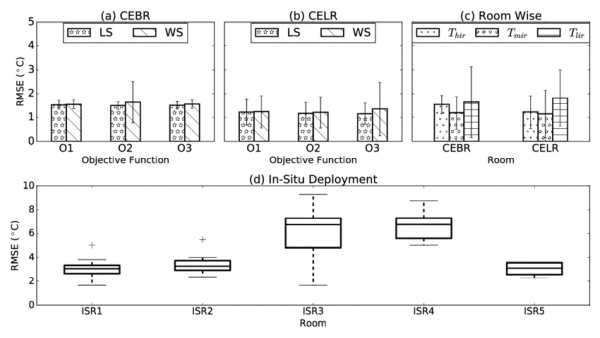

In [ ]:
from sklearn.model_selection import LeavePOut,cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris=load_iris()
X=iris.data
Y=iris.target

leave_p_out=LeavePOut(p=2)
leave_p_out.get_n_splits(X)

random_forrest_classifier=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(random_forrest_classifier,X,Y,cv=leave_p_out)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

## Monte Carlo Cross Validation/Shuffle Split

This type of cross validation is used as a flexible cross validation strategy, using this approach we split the data points into a number of partitions randomly, we will still be setting the percentage of the of the training and validation set, but the partitions are created at random.

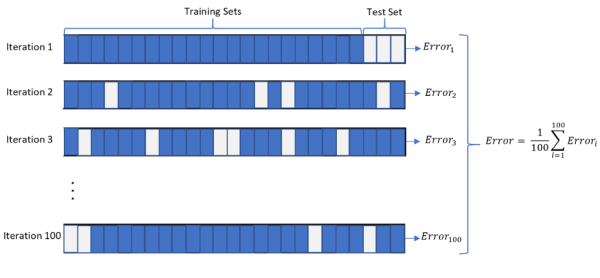

In [ ]:
from sklearn.model_selection import cross_val_score,ShuffleSplit
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
linear_regression=LogisticRegression()

shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)
cross_val_scores=cross_val_score(linear_regression,iris.data,iris.target,cv=shuffle_split)

print("cross Validation cross_val_scores:n {}".format(cross_val_scores))
print("Average Cross Validation score :{}".format(cross_val_scores.mean()))

## Time Series CV

- Regular cross validation techniques are not useful when working with time series datasets, time series datasets, can’t be randomly split and used for training and model validation, as we might miss on important components such as seasonality etc. 
- With the order of the data being important it is difficult to split the data in any given interval. 
- To tackle this issue we can use time series cross validation.
- In this type of cross validation we take a small subsample of the data (keeping the order intact) and try and predict the immediate next examples for validation
    - this is also referred to as “forward chaining” or sometimes also refered to as “rolling cross validation”
    - as we are continuously training and validating the model on the small snippets of data we are sure to found a good model 
    - if we can see that it is able to give good result on this rolling samples.

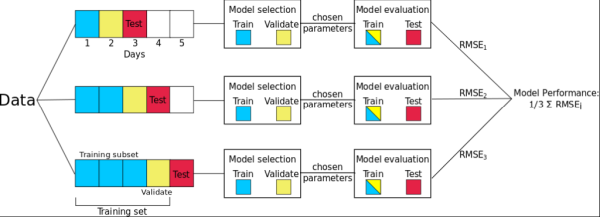

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [77,33]])
y = np.array([1, 2, 3, 4, 5, 6, 7])

rolling_time_series = TimeSeriesSplit()
print(rolling_time_series)

for current_training_samples, current_testing_samples in rolling_time_series.split(X):
    print("TRAIN:", current_training_samples, "TEST:", current_testing_samples)
    X_train, X_test = X[current_training_samples], X[current_testing_samples]
    y_train, y_test = y[current_training_samples], y[current_testing_samples]

## K Fold Cross-Validation

- This is one of the most famous implementation techniques for cross-validation, the main focus in this one is around creating different “folds” of data(usually equal in size), which we use for validating the model and the rest of the data is used for the training process. 
- All the folds will be iteratively used for the validation process with the others combined for the training data sample. 
- As the name suggests the training cycles in this will be repeated k-times, and the final accuracy will be computed by taking the mean from the individual data validation runs.

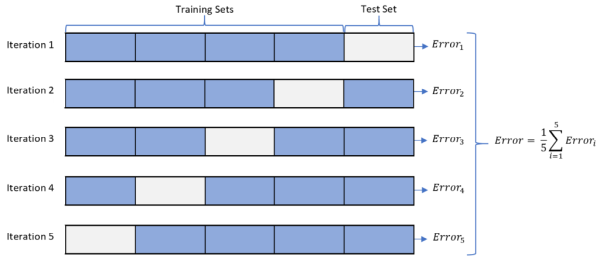

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
features=iris.data
outcomes=iris.target

logreg=LogisticRegression()
K_fold_validation=KFold(n_splits=5)
score=cross_val_score(logreg,features,outcomes,cv=K_fold_validation)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))